<table style="width:100%"><tr>
<td> 
    
<b>Technische Universität Dortmund</b>    
Department of Bio- and Chemical Engineering\
Laboratory of Process Automation Systems\
Prof. Dr. Sergio Lucia </td>
<td>  <img src="./support_files/figures/tudo_logo.png" style="width: 60%;" align="right"/> </td>
</tr>
</table>

# Advanced Process Control - Tutorial 04
WS 2022 / 2023

# <span class="graffiti-highlight graffiti-id_5m4qcsv-id_7jvslic"><i></i>State Estimation of Non-linear Systems</span>
In this exercise, we will perform state estimation for non-linear systems using an Extended Kalman Filter (EKF)\
**We assume that you have completed the previous exercise in which we covered the design and Implementation of state estimators for linear systems. 
This tutorial also uses functionalities from the CasaDi package (tutorial 2).**


# Three-Tank System Discrete Nonlinear System

For this tutorial, we are going to consider the following<span class="graffiti-highlight graffiti-id_tgqkk3x-id_23yzj32"><i></i> three-tank system example</span> [[1]](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8879526).




<img src="./support_files/figures/three_tank_system.png" style="width: 60%;" align="center"/>


The plant consists of three tanks with a cross-sectional area $A$. They are connected serially together through connecting pipes with cross-sectional area $S_{p}$. The input to the system is through two pumps. The flow of both pumps is assumed to be **constant**. Our states ($x_1$, $x_2$, and $x_3$) are the level of water in each of the tanks. We assume the water level in tank three is measured. The water level in each of the tanks can be described by the following equations.  

\begin{align}
{x_1}(k+1) &= x_1(k)+ \frac{T_s}{A}(-q_{13}(k)+u_1(k)) \\
{x_2}(k+1) &= x_2(k)+ \frac{T_s}{A}(q_{32}(k)-q_{20}+u_2(k)) \\
{x_3}(k+1) &= x_3(k)+ \frac{T_s}{A}(q_{13}(k)-q_{32}) \\
\end{align}

where, 

\begin{align}
q_{13}(k) &= r_{1}S_{p}Sign(x_1(k)-x_3(k))\sqrt{2g|x_1(k)-x_3(k)|} \\
q_{32}(k) &= r_3S_pSign(x_3(k)-x_2(k))\sqrt{2g|x_3(k)-x_2(k)|} \\
q_{20}(k) &= r_2S_p\sqrt{2gx_2(k)} \\
\end{align}

The cross-sectional area A of the three tanks is $0.00154$ $m^2$. The outflow coefficients $r_i$ of the pipes are 1, 0.8, and 1 respectively. The connecting pipes are assumed to have a cross-sectional area of $S_p = 5\times10^{-5}$. The flow rate of both pumps is $u_1=u_2=1\times 10^{-4}$. The sampling time $T_s$ is fixed for one second.\
\
**Note**: $q_{1f}$ and $q_{2f}$ are disturbances to the plant and are assumed to be zero. 

The<span class="graffiti-highlight graffiti-id_yunxucp-id_6en1icz"><i></i> first step would</span> be to import important packages that we are going to use. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from casadi import *

We then define the constant parameters given in the description :

In [2]:
# Defining parameters
A = 0.00154
g = 9.81
Ts = 1
r1 = 1
r2 = 0.8
r3 = 1
sp = 5 * 1e-5

# nx the number of states, nu the number of inputs and ny the number of measurements
nx = 3
nu = 2
ny = 1
# constant flow from both pumps
u_k = np.array([0.0001, 0.0001]).reshape([-1, 1])

# Task 01 : <span class="graffiti-highlight graffiti-id_q75z8me-id_icikp32"><i></i>Define symbolic expressions for the states, outputs and system equations</span>

In this exercise, we will be working with the CasADi package. The idea is to create a symbolic expression of the discrete non-linear system. We can do that through the following steps. 

1. Define a vector of symbolic variables for the states `x` taking into account the predefined state dimension `nx`.  
2. Define a vector of symbols for the input `u` taking into consideration the dimension `nu`.

**Hint**: Please see the [CasADi documentation](https://web.casadi.org/docs/) or revisit tutorial 2 on how to work with CasADi symbolic variables.

In [3]:
# your code here !

# defining symbolic expressions for states and input
x = SX.sym("x", nx)
u = SX.sym("u", nu)

<span class="graffiti-highlight graffiti-id_m0ddrxs-id_o5eu5vx"><i></i><button>Show Solution</button></span>

3. Define a symbolic expression to represent the discrete system equations ($x_{k+1}$) and name it `x_next`. We propose the following:
    1. Define an expression for each state separately (`x_next_i`). 
    2. Concatenate these expressions using [vertcat](https://web.casadi.org/docs/#list-of-operations) from the CasADi library. 
    
**Note:** The index **i** refers to the tank number i.e for our system `x_next_1` is $x_{1}(k+1)$ and `x_next_2` is $x_{2}(k+1)$. 

**Hint:** You may need to have a look at this list of [CasADi operations](https://web.casadi.org/docs/#list-of-operations). CasADi operations can also be found [here](https://web.casadi.org/python-api/) (poorly documented). Note also that some numpy operations, such as ``np.sin`` can be used with CasADi symbolic variables. 

In [4]:
# your code here !

# defining auxiliary variables
q13 = r1 * sp * sign(x[0] - x[2]) * sqrt(2 * g * fabs(x[0] - x[2]))
q32 = r3 * sp * sign(x[2] - x[1]) * sqrt(2 * g * fabs(x[2] - x[1]))
q20 = r2 * sp * sqrt(2 * g * x[1])

# non-linear discrete equations
x_next_1 = x[0] + (Ts / A) * (-q13 + u[0])
x_next_2 = x[1] + (Ts / A) * (q32 - q20 + u[1])
x_next_3 = x[2] + (Ts / A) * (q13 - q32)

# concatenated into one vector
x_next = vertcat(x_next_1, x_next_2, x_next_3)

<span class="graffiti-highlight graffiti-id_exl5o01-id_oy4j6yb"><i></i><button>Show Solution</button></span>

Click <span class="graffiti-highlight graffiti-id_621s076-id_ow0dsvw"><i></i>here</span> for explanation.

4. Create a CasADi [Function](https://web.casadi.org/docs/#document-function) that takes as an input the current state $x_{k}$ and input $u_{k}$ and returns the next state $x_{k+1}$. This function should be named `system`:
```python
system = Function(...)
```

In [5]:
# your code here !

# defining CasADi function
system = Function('x_next', [x,u], [x_next])

<span class="graffiti-highlight graffiti-id_5f3ahg3-id_xmp3hij"><i></i><button>Show Solution</button></span>

Click <span class="graffiti-highlight graffiti-id_d23t6sh-id_5a6a5pq"><i></i>here</span> for explanation.

5. Create an expression for the measurement at time step $k$ `y_k`, and define a CasADi function `measurement` that takes as input the current state $x_{k}$ and returns the corresponding measurement. 

**Reminder** : We are measuring the level of tank 3. 

In [6]:
# your code here !

# output function symbolically
y_k = x[2]

# CasADi function for the measurements
measurement = Function('y_k', [x], [y_k])

<span class="graffiti-highlight graffiti-id_3ppdh1b-id_vdlhr9i"><i></i><button>Show Solution</button></span>

# Task 02: <span class="graffiti-highlight graffiti-id_fv8xsuy-id_iqk7tjy"><i></i>Create a function to simulate the system</span>

The idea is to design a function `simulate` that takes as an input the initial condition `x_0` , a constant input `u_k` and the number of steps `N_sim` and returns a vector of the state trajectory and measurement trajectory.

Write the function:
```python
def simulate(x_0, u_k, N_sim):
    ...
```

and perform the following steps in the body of the function:
1. Create a list `res_x` that stores state trajectories and append the initial state.
2. Create a list `res_y`that stores the measurement trajectories and append the corresponding measurement with the initial state. 
3. Design a For-Loop that calls `system` and `measurement` functions `N_sim` times.
4. Use `np.concatenate` to transform the 1-D list into a 2-D array.
5. Return the concatenated arrays `res_x` and `res_y`.

In [7]:
# your code here !

def simulate(x_0, u_k, N_sim):
    res_x = [x_0]
    y = measurement(x_0).full()
    res_y = [y]

    for i in range(N_sim):
        x_0 = system(x_0, u_k).full()
        y = measurement(x_0)
        res_x.append(x_0)
        res_y.append(y)

    res_x = np.concatenate(res_x, axis=1)
    res_y = np.concatenate(res_y, axis=1)

    return res_x, res_y

<span class="graffiti-highlight graffiti-id_jiqsskh-id_r3djwo0"><i></i><button>Show Solution</button></span>

# Task 03 : Simulate the system for different initial conditions 

We use the function `simulate`  to simulate how the system evolves for different initial conditions. We test the system for the following two initial conditions $x_0^1=[2, 2.8, 2.7]$ and $x_0^2=[1.2, 1.4, 1.8]$. The following steps will lead you through the procedure. 

1. Define two initial conditions `initial_one` and `initial_two` and initialize them with their corresponding values.
2. Define `N_sim` which corresponds to the simulation steps. We would like to simulate the system for 200 steps 
3. Call the function `simulate` with the defined variables and store the returns to (`state_one`,`measurement_one`,`state_two`,`measurement_two`).

In [8]:
# your code here !

# Defining inital condition and the number of steps 
initial_one = np.array([2, 2.8, 2.7]).reshape([-1, 1])
initial_two = np.array([1.2, 1.4, 1.8]).reshape([-1, 1])
N_sim = 200

# Call the function "simulate"
state_one, measurement_one = simulate(initial_one, u_k, N_sim)
state_two, measurement_two = simulate(initial_two, u_k, N_sim)

<span class="graffiti-highlight graffiti-id_j52hfgc-id_jtkoqg6"><i></i><button>Hide Solution</button></span>

In [9]:
# Defining inital condition and the number of steps 
initial_one = np.array([2, 2.8, 2.7]).reshape([-1, 1])
initial_two = np.array([1.2, 1.4, 1.8]).reshape([-1, 1])
N_sim = 200

# Call the function "simulate"
state_one, measurement_one = simulate(initial_one, u_k, N_sim)
state_two, measurement_two = simulate(initial_two, u_k, N_sim)

Use the given code to plot how the system evolves for different initial points. 

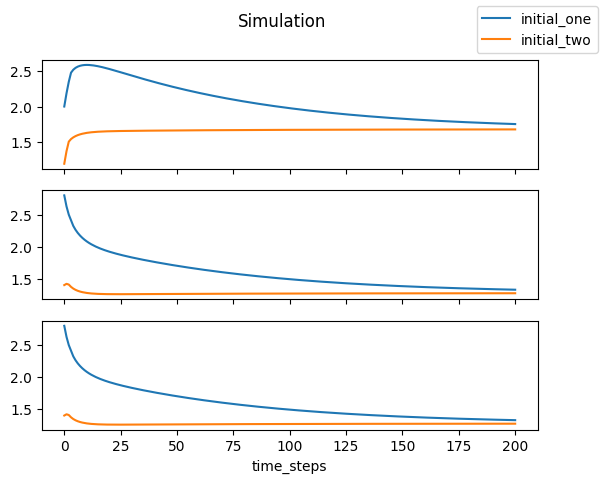

In [10]:
## use this code to plot your results
fig, ax = plt.subplots(nx)
fig.suptitle('Simulation')

for i in range(nx - 1):
    ax[i].plot(state_one[i, :])
    ax[i].plot(state_two[i, :])
    ax[i].set_xticklabels([])

ax[nx - 1].plot(state_one[i, :])
ax[nx - 1].plot(state_two[i, :])
ax[nx - 1].set_xlabel('time_steps')
fig.legend(["initial_one", "initial_two"])

plt.show()

<span class="graffiti-highlight graffiti-id_0xol1s0-id_rvl0rya"><i></i>What do we see ?</span>

# <span class="graffiti-highlight graffiti-id_6ndkd6w-id_bxk7x1l"><i></i>Observability of the nonlinear system </span>

To check the observability of the system around a linearized point we can use the Kalman criterion. The system is locally observable (at the linearization point) if and only if the rank of the observability matrix rank($\mathcal{O}$) is equal to the order of the system ($n$). The observability matrix is defined as:  

\begin{align}
\mathcal{O} &= \begin{pmatrix}
										\tilde{C}\\
										\tilde{C} \tilde{A} \\
                                        \vdots \\
                                        \tilde{C}\tilde{A}^{n-1} \\
						 \end{pmatrix}  
\end{align}



where, 

\begin{align}
\tilde{A}_{k} = \left.\frac{\partial \mathbf{f}}{\partial \mathbf{x}}\right|_{\hat{\mathbf{x}}_{k},\mathbf{u}_k} \qquad \tilde{C}_{k} = \left.\frac{\partial \mathbf{h}}{\partial \mathbf{x}}\right|_{\hat{\mathbf{x}}_k}
\end{align}

To check the observability of the system along the whole trajectory it will be linearized around each point of that trajectory. Please note that this does not guarantee that the system is globally stable. 

# Task 04 : Create symbolic functions to calculate the Jacobians

For the linearization of the system dynamics and measurement equation at different points, we utilize CasADi symbolic calculations. 
This can be done through the following steps. 
1. Create a symbolic expression for the jacobian `a_tilde` and `c_tilde` using [jacobian](https://web.casadi.org/docs/) from the CasADi package. 
2. Create a CasADi function `A_fun` to calculate the linearized system matrix. It will take as an input the symbolic state  `x` and input `u` and will return the evaluated jacobian of $\partial_x f(x,u)$ at $x_{k}$ and $u_k$. 
3. Create a CasADi function `C_fun` for the linearized measurements.

**Note:** 
- Expressions `f(x,u)` and `h(x)` refer to the system dynamics and output equation that have been defined in task 01.  
- Operations, e.g. [jacobian](https://web.casadi.org/docs/), must be applied to CasADi **expressions** not to CasADi **functions. 
- The output equation `h(x)` is linear leading to a constant $C$. However, this code is meant to work for general nonlinear systems.

In [11]:
# your code here !

# calculating the jacobins
a_tilde = jacobian(x_next,x)
c_tilde = jacobian(y_k,x)

# CasAdi Functions
A_fun = Function('A_fun', [x,u], [a_tilde])
C_fun = Function('C_fun', [x], [c_tilde])

<span class="graffiti-highlight graffiti-id_nz9h5es-id_befh5kg"><i></i><button>Show Solution</button></span>

<span class="graffiti-highlight graffiti-id_r6994a0-id_c5yv28j"><i></i>code explanation.</span>

# Task 04 : Checking observability over the whole trajectory

We use again the function `observability_matrix` that we created in the last tutorial. 

In [12]:
def observability_matrix(A,C):
    nx = A.shape[0]
    O = C
    
    for k in range(1,nx):
        O = np.concatenate((O, C@np.linalg.matrix_power(A,k)))
        
    return O

Now we would like to check the observability of our system along the whole trajectory of states. We can do that by following these steps: 
1. Use the defined function `simulate` to get the list of states. 
2. Create a For-Loop to go through the elements of the list. 
3. Calculate `A_tilde` and `C_tilde` using functions `A_fun` and `C_fun`.
4. Use the function `observability_matrix` to calculate the observability matrix for the linearized system. 
5. Break the loop if one of the states is unobservable.
6. Return **True** if all of the states are observable.

In [13]:
# your code here !

def obs_check(x0, u_k ,N_sim):
    observable = True
    states, _ = simulate(x0, u_k, N_sim)

    for i in range(N_sim):
        
        if not observable:
            break

        A_tilde = A_fun(states[:, i],u_k)
        C_tilde = C_fun(states[:, i])
        O = observability_matrix(A_tilde, C_tilde)
        observable = np.linalg.matrix_rank(O) == nx

    return observable

<span class="graffiti-highlight graffiti-id_m10uaz8-id_odkhhbc"><i></i><button>Show Solution</button></span>

<span class="graffiti-highlight graffiti-id_h7mcquk-id_cdnerse"><i></i>code explanation.</span>

Check the observability of the system for the intial point defined earlier, for 200 time steps.

In [14]:
# your code here !
N_sim = 200
obs_check(initial_one, u_k, N_sim)

True

<span class="graffiti-highlight graffiti-id_afhpwic-id_a4tzcyn"><i></i><button>Show Solution</button></span>

# <span class="graffiti-highlight graffiti-id_o0xwmla-id_xx5mu5v"><i></i>Discrete Extended Kalman Filter</span>


Consider the following nonlinear dynamic system :
\begin{align}
\mathbf{x}_{k+1} &= \mathbf{f}(\mathbf{x}_k,\mathbf{u}_k) + \mathbf{w}_x \\
\mathbf{y}_k & = \mathbf{h}(\mathbf{x}_k) + \mathbf{w}_y
\end{align}
<br/><br/>

with $w_x\sim\mathcal{N}(0,Q)$, and $w_y\sim\mathcal{N}(0,R)$ and Gaussian distribution of the initial estimate $x_0\sim\mathcal{N}(0,P)$. 

<br/><br/>


The algorithm of the discrete EKF can be divided into two steps:
<ul>

<li> <u>Correction or Measurement update </u></li>
\begin{align}
\mathbf{L}_k &= \mathbf{P}^{-}_{k} \: \mathbf{\tilde{C}}^T_{k}\left(\mathbf{\tilde{C}}_{k}\mathbf{P}^{-}_{k}\mathbf{\tilde{C}}^T_{k}+\mathbf{R}\right)^{-1}\\
\hat{\mathbf{x}}_{k} &= \hat{\mathbf{x}}^{-}_{k}+\mathbf{L}_k\left(\mathbf{y}_k-\mathbf{h}(\hat{\mathbf{x}}^{-}_{k})\right)\\
\mathbf{P}_{k} &= \left(I-\mathbf{L}_k\mathbf{\tilde{C}}_{k}\right)\mathbf{P}^{-}_{k}
\end{align}
    
<li> <u> Prediction or Time update </u> </li>
    
Based on the last corrected estimate  $\hat{\mathbf{x}}_{k}$, the states for the next step are predicted by the model equations without considering disturbances:
\begin{align}
\hat{\mathbf{x}}^{-}_{k}=\mathbf{f}(\hat{\mathbf{x}}_{k-1},\mathbf{u}_{k-1})
\end{align}
Furthermore, the covariance matrix of the estimation error is predicted for the next sample time:
\begin{align}
\mathbf{P}^{-}_{k}=\mathbf{\tilde{A}}_{k}\mathbf{P}_{k-1}\mathbf{\tilde{A}}_{k}^T + \mathbf{Q}
\end{align}
with:
\begin{align}
\mathbf{\tilde{A}}_{k} = \left.\frac{\partial \mathbf{f}}{\partial \mathbf{x}}\right|_{\hat{\mathbf{x}}_{k-1},\mathbf{u}_k} \qquad \mathbf{\tilde{C}}_{k} = \left.\frac{\partial \mathbf{h}}{\partial \mathbf{x}}\right|_{\hat{\mathbf{x}}^{-}_k}
\end{align}

<ul>

## Task 5: Simulate and estimate the system with the Extended Kalman filter

Similarly to tutorial 3, we would like to simulate and estimate the states of the investigated system. This time we want to formulate the discrete observer into a function. The function should have the following signature:

```python
def discrete_EKF_filter(x0, x0_observer, P_0, Q, R, N_sim):
    ...
    return x_data, x_hat_data, y_measured
```
With inputs:
1. `x0` initial condition of the plant
2. `x0_observer` initial condition for the observer
3. `P_0`, `Q` and `R` parameters of the kalman filter
4. `N_sim` number of simulation steps. 

The function should return:
1. `x_data`, an array of the true states of the plant
2. `plant_measurements`, an array of the measurements
3. `y_measured`, an array of the observer states.

The main loop of the function should:
1. Store the states of the observer and the plant 
2. Add the noise to the process and measurements 
3. Carry the correction step 
4. Carry the prediction step.

To make it easier for you we will break this task into three sub-tasks.

### Task 5.1 : Define the function , initial parameters and return variables

1. The function `discrete_EKF_filter` should take as an input `x0`, `x0_observer` ,`P_0`, `Q` ,`R` parameters of the Kalman filter `N_sim`.
2. Initiate lists to store the real (`x_data`) and estimated states (`x_hat_data`) and obtained measurements ``y_measured``. These lists `x_data` and `x_hat_data` should already contain the real and estimated initial state.
3. Define the noise variances ``var_x`` and ``var_y`` equal to the variances of the `Q` and `R`. 


In [15]:
# your code here !

def discrete_EKF_filter(x0, x0_observer, P_0, Q, R, N_sim):
    # defining empty list
    x_data = [x0]
    x_hat_data = [x0_observer]
    y_measured = []
    # defining noise variance
    var_x = Q @ np.ones([nx, 1])
    var_y = R @ np.ones([ny, 1])

    return x_data, x_hat_data, y_measured

<span class="graffiti-highlight graffiti-id_6n7md4v-id_wrxcn3h"><i></i><button>Hide Solution</button></span>

<span class="graffiti-highlight graffiti-id_l4w0vih-id_6wak3l4"><i></i>code explanation.</span>

### Task 5.2 : Design the correction step

**Note:** We build on the function we designed in Task 5.1. Please copy and paste the code from above and extend it.

Write a For-loop involving the following steps:
1. Use the variances calculated (`var_x` and `var_y`) to sample gaussian noise for the measurement  `wy` and plant `wx`. **Reminder :** [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)   
2. Calculate the linearized measurement matrix `C_tilda`.   (Note: In this question, the measurement matrix is already linear but we follow this step for generalizability).
3. Calculate the gain matrix `L`. 
4. Update the plant state `x0` and calculate the new measurement `y`( Do not forget to add the sampled measurement noise and process noise).
5. Update your current observer estimate `x0_observer`.
6. Update `P` in the error covariance matrix.
7. Append `y` measurement, `x0_observer` observer state and `x_0` to `y_measurement`,`x_hat_data` and `x_data`.

In [16]:
# your code here !

def discrete_EKF_filter(x0, x0_observer, P_0, Q, R, N_sim):
    # defining empty list
    x_data = [x0]
    x_hat_data = [x0_observer]
    y_measured = []
    
    # defining noise variance
    var_x = Q @ np.ones([nx, 1])
    var_y = R @ np.ones([ny, 1])

    for j in range(50):
         
        # Gaussian noise for the plant and measurement
        wx = np.random.normal(0, np.sqrt(var_x)).reshape(nx, 1)
        wy = np.random.normal(0, np.sqrt(var_y)).reshape(ny, 1)
       
        # Measurement update / Correction
        C_tilda =C_fun(x0_observer).full()
        L = P_0 @ C_tilda.T @ inv(C_tilda @ P_0 @ C_tilda.T + R)

        x0 = system(x0).full() + wx 
        y = measurement(x0).full() + wy
        x0_observer = x0_observer + L @ (y - C_tilda @ x0_observer) 
        P_0 = (np.eye(nx) - L @ C_tilda) @ P_0

        x_data.append(x0)
        x_hat_data.append(x0_observer)
        y_measured.append(y)

    return plant_state, plant_measurement, obs_state, obs_meas

<span class="graffiti-highlight graffiti-id_051e16q-id_cya4xpk"><i></i><button>Hide Solution</button></span>

In [17]:
def discrete_EKF_filter(x0, x0_observer, P_0, Q, R, N_sim):
    # defining empty list
    x_data = [x0]
    x_hat_data = [x0_observer]
    y_measured = []
    
    # defining noise variance
    var_x = Q @ np.ones([nx, 1])
    var_y = R @ np.ones([ny, 1])

    for j in range(N_sim):
         
        # Gaussian noise for the plant and measurement
        wx = np.random.normal(0, np.sqrt(var_x)).reshape(nx, 1)
        wy = np.random.normal(0, np.sqrt(var_y)).reshape(ny, 1)
       
        # Measurement update / Correction
        C_tilda =C_fun(x0_observer).full()
        L = P_0 @ C_tilda.T @ inv(C_tilda @ P_0 @ C_tilda.T + R)

        x0 = system(x0,u_k).full() + wx 
        y = measurement(x0).full() + wy
        x0_observer = x0_observer + L @ (y - C_tilda @ x0_observer) 
        P_0 = (np.eye(nx) - L @ C_tilda) @ P_0

        x_data.append(x0)
        x_hat_data.append(x0_observer)
        y_measured.append(y)

    return plant_state, plant_measurement, obs_state, obs_meas

<span class="graffiti-highlight graffiti-id_8gytqy1-id_f0q64ku"><i></i>code explanation.</span>

### Task 5.3 : Design the prediction step

**Note:** We build on the function we designed in Task 5.2. Please copy and paste the code from above and extend it.

1. Initial estimate of the observer state `x0_observer`.
2. Calculate the linearized  measurement matrix `A_tilde`
3. Initial value for `P_0`.
4. Outside the for-loop concatenate `x_data` and `x_hat_data` to arrays (use `np.concatenate`).

In [18]:
# your code here !

def discrete_EKF_filter(x0, x0_observer, P_0, Q, R, N_sim):
    # defining empty list
    x_data = [x0]
    x_hat_data = [x0_observer]
    y_measured = []
    # defining noise variance
    var_x = Q @ np.ones([nx, 1])
    var_y = R @ np.ones([ny, 1])


    for j in range(N_sim):
        # Gaussian noise for the plant and measurement
        wx = np.random.normal(0, np.sqrt(var_x)).reshape(nx, 1)
        wy = np.random.normal(0, np.sqrt(var_y)).reshape(ny, 1)
       
        # Measurement update / Correction
        C_tilda =C_fun(x0_observer).full()
        L = P_0 @ C_tilda.T @ inv(C_tilda @ P_0 @ C_tilda.T + R)

        x0 = system(x0, u_k).full() + wx
        y = measurement(x0).full() + wy
        x0_observer = x0_observer + L @ (y - C_tilda @ x0_observer)
        P_0 = (np.eye(nx) - L @ C_tilda) @ P_0

        x_data.append(x0)
        x_hat_data.append(x0_observer)
        y_measured.append(y)

        # Prediction_step
        x0_observer = system(x0_observer, u_k).full()  # x[k+1|k]
        A = A_fun(x0_observer, u_k)
        P_0 = A @ P_0 @ A.T + Q  # P[k+1|k]

    x_data = np.concatenate(x_data, axis=1)
    x_hat_data = np.concatenate(x_hat_data, axis=1)

    return x_data, x_hat_data, y_measured

<span class="graffiti-highlight graffiti-id_bxo16ku-id_623bt25"><i></i><button>Hide Solution</button></span>

In [19]:
def discrete_EKF_filter(x0, x0_observer, P_0, Q, R, N_sim):
    # defining empty list
    x_data = [x0]
    x_hat_data = [x0_observer]
    y_measured = []
    # defining noise variance
    var_x = Q @ np.ones([nx, 1])
    var_y = R @ np.ones([ny, 1])


    for j in range(N_sim):
        # Gaussian noise for the plant and measurement
        #wx = np.random.normal(0, np.sqrt(var_x)).reshape(nx, 1)
        wx = 0.001*np.random.randn(3,1)
        wy = np.random.normal(0, np.sqrt(var_y)).reshape(ny, 1)
        wy = 0*wy
        #wx=0.001*np.random.randn(0,1).reshape(1,-1)*np.ones([nx, 1])
        #wy=0.001*np.random.randn(0,1).reshape(1,-1)*np.ones([ny, 1])

       
        # Measurement update / Correction
        C_tilda =C_fun(x0_observer).full()
        L = P_0 @ C_tilda.T @ inv(C_tilda @ P_0 @ C_tilda.T + R)

        x0 = system(x0, u_k).full() + wx
        y = measurement(x0).full() + wy
        x0_observer = x0_observer + L @ (y - C_tilda @ x0_observer)
        P_0 = (np.eye(nx) - L @ C_tilda) @ P_0

        x_data.append(x0)
        x_hat_data.append(x0_observer)
        y_measured.append(y)

        # Prediction_step
        x0_observer = system(x0_observer, u_k).full()  # x[k+1|k]
        A = A_fun(x0_observer, u_k)
        P_0 = A @ P_0 @ A.T + Q  # P[k+1|k]

    x_data = np.concatenate(x_data, axis=1)
    x_hat_data = np.concatenate(x_hat_data, axis=1)

    return x_data, x_hat_data, y_measured

<span class="graffiti-highlight graffiti-id_x21my4v-id_yxwdz47"><i></i>code explanation.</span>

## Task 06 : Designing a Plotting function 

Since we are going to test the EKF on different settings. It makes sense to design a function that plots the plant states against the observer prediction.
Create a function: 
```python
def visualize(x_data, x_hat_data):
    ...
```
In the function,
1. Create a new figure with three (`nx`) subplots, e.g. with ``fig, ax = plt.subplots(nx)``
2. In each subplot:
    - Create a line for the true state.
    - Create a line for the estimated state.
3. Create labels and a legend for the plot

In [20]:
# your code here !

def visualize(x_data, x_hat_data):
    fig, ax = plt.subplots(nx)
    fig.suptitle('EKF Observer')

    for i in range(nx):
        ax[i].plot(x_data[i, :], label='real state')
        ax[i].plot(x_hat_data[i, :],"r--", label='estimated state')
        ax[i].set_xticklabels([])

    ax[-1].set_xlabel('time_steps')
    fig.legend()
    plt.show()

<span class="graffiti-highlight graffiti-id_6zfphfi-id_dtynfqx"><i></i><button>Hide Solution</button></span>

In [21]:
def visualize(x_data, x_hat_data):
    fig, ax = plt.subplots(nx)
    fig.suptitle('EKF Observer')

    for i in range(nx):
        ax[i].plot(x_data[i, :], label='real state')
        ax[i].plot(x_hat_data[i, :],"r--", label='estimated state')
        ax[i].set_xticklabels([])

    ax[-1].set_xlabel('time_steps')
    fig.legend()
    plt.show()

## EKF performance for different scenarios

In the following, we want to investigate the EKF performance for different scenarios. In particular, we investigate different initial conditions and noise levels.

To understand these effects, we quickly recap the effect of the  parameters ($\mathbf{Q}$, $\mathbf{R}$, $\mathbf{P}_0$):
    
$\mathbf{Q}$ denotes the process noise covariance. Decreasing the values of the elements of $\mathbf{Q}$ yield a larger weight of the model equations, i.e. the model is assumed to be more accurate. 
    
$\mathbf{R}$ denotes the measurement noise covariance. Decreasing the values of the elements of $\mathbf{R}$ yield an increasing weight of the concerning measurements, i.e. the measurement is assumed to be more reliable.

$\mathbf{P}_0$ denotes the covariance matrix of the initial error. It has a large influence on the initial behaviour of the EKF and can be interpreted as a weighting factor of the initial guess, i.e. small values of the elements of $\mathbf{P}_0$ imply a high accuracy of the initial estimate. 


To test the EKF we need to define the following:
1. Initial condition for the observer `x_observer`.
2. Initial condition for the plant `x_0`.
3. The measurement covariance matrix `R`.
4. The model covariance matrix `Q`. 
5. Initial estimate of the error covariance `P_0`.
6. The number of wanted simulation steps `N_sim`.

Finally, we call the function `discrete_EKF_Filter` and pass the returned arrays ``plant_state`` and ``ob_state`` to our function ``visualize`` to obtain the desired plot.

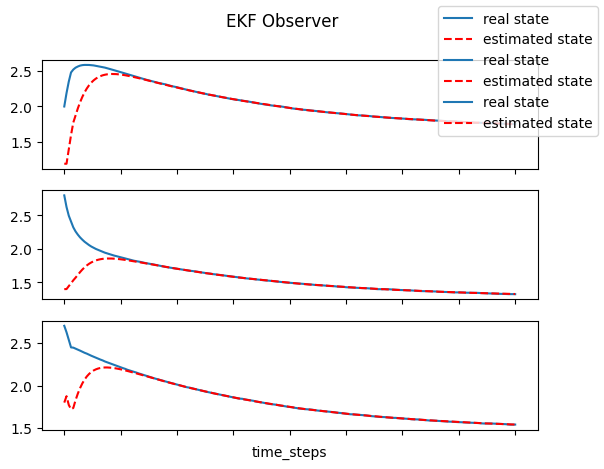

In [22]:
# your code here !
np.random.seed(1)
x0 = np.array([2, 2.8, 2.7]).reshape([-1, 1])
x_observer = np.array([1.2, 1.4, 1.8]).reshape([-1, 1])

# Define the measurement covariance matrix
R = np.array([0.01])

# Covariance matrix of the state noise
q1 = 1e-3;
q2 = 1e-3;
q3 = 1e-3;

Q = np.diag([q1, q2,q3]);

# Covariance Matrix of initial error
P0 = Q ;
#N_sim = 10
N_sim = 200

#call EKF function
[plant_state0, obs_state_discrete0, plant_measurement0] = discrete_EKF_filter(x0, x_observer, P0, Q, R, N_sim )
visualize(plant_state0, obs_state_discrete0)

<span class="graffiti-highlight graffiti-id_95pqwif-id_js9hfgz"><i></i><button>Show Solution</button></span>

## Task 6: Simulate and estimate the system with the Extended Kalman filter with do_mpc

In [23]:
import os
import sys
rel_do_mpc_path = os.path.join('..','..')
sys.path.append(rel_do_mpc_path)
import do_mpc
from template_model import template_model
from template_ekf import template_ekf
from template_simulator import template_simulator


def discrete_EKF_filter_do_mpc(x0, x0_observer, P_0, Q, R, N_sim, debug_flag=False, non_linear_simulation = False):

    # defining empty list
    x_data = [x0]
    x_hat_data = [x0_observer]
    y_measured = []
    # defining noise variance
    var_x = Q @ np.ones([nx, 1])
    var_y = R @ np.ones([ny, 1])

    model = template_model()
    #simulator = template_simulator(model)
    ekf = template_ekf(model)
    #x0_init = np.zeros(model.n_x)
    ekf.x0 = x0_observer
    ekf.set_initial_guess()
    #simulator.x0 = x0
    #simulator.set_initial_guess()


    for j in range(N_sim):
        # Plant simulation
        # Gaussian noise for the plant and measurement
        wx = 0.001*np.random.randn(3,1)
        wy = np.random.normal(0, np.sqrt(var_y)).reshape(ny, 1)
        wy = 0*wy
        x0 = system(x0, u_k).full() + wx
        y = measurement(x0).full() + wy

        x0_observer = ekf.make_step(y_next = y, u_next = u_k, debug_flag=debug_flag, non_linear_simulation=non_linear_simulation)

        # Storing data
        x_data.append(x0)
        x_hat_data.append(x0_observer)
        y_measured.append(y)

    x_data = np.concatenate(x_data, axis=1)
    x_hat_data = np.concatenate(x_hat_data, axis=1)

    return x_data, x_hat_data, y_measured

c:\Users\Sourjya\OneDrive\TU Dortmund\PAS\Work\do-mpc-naskar\examples\triple_tank_ekf\..\..\do_mpc\sysid\__init__.py:15: UserWarning: The ONNX feature is not available. Please install the full version of do-mpc to access this feature.
  warnings.warn('The ONNX feature is not available. Please install the full version of do-mpc to access this feature.')
c:\Users\Sourjya\OneDrive\TU Dortmund\PAS\Work\do-mpc-naskar\examples\triple_tank_ekf\..\..\do_mpc\opcua\__init__.py:14: UserWarning: The opcua feature is not available. Please install the full version of do-mpc to access this feature.
  warnings.warn('The opcua feature is not available. Please install the full version of do-mpc to access this feature.')




#######Iteration number####### :  0
Predicted state (aposteriori) :  Mutable DM with following structure:
Structure with total size 3.
Structure holding 3 entries.
  Order: ['x1', 'x2', 'x3']
  x1 = 1x1
  x2 = 1x1
  x3 = 1x1

Predicted state (aposteriori) type:  <class 'casadi.tools.structure3.DMStruct'>
Predicted state (aposteriori) shape :  (3, 1)
Input :  [[0.0001]
 [0.0001]]
Input type:  <class 'numpy.ndarray'>
Input shape :  (2, 1)

system matrix: A
[[0.90716897 0.         0.09283103]
 [0.         0.83768793 0.11369433]
 [0.09283103 0.11369433 0.79347464]]
Shape: (3, 3)

input matrix: B
[[649.35064935   0.        ]
 [  0.         649.35064935]
 [  0.           0.        ]]
Shape: (3, 2)

measurement matrix: C
[[0. 0. 1.]]
Shape: (1, 3)

output disturbance matrix: D
[[0. 0.]]
Shape: (1, 2)


#######Iteration number####### :  0
Predicted state (aposteriori) :  Mutable DM with following structure:
Structure with total size 3.
Structure holding 3 entries.
  Order: ['x1', 'x2', 'x3']

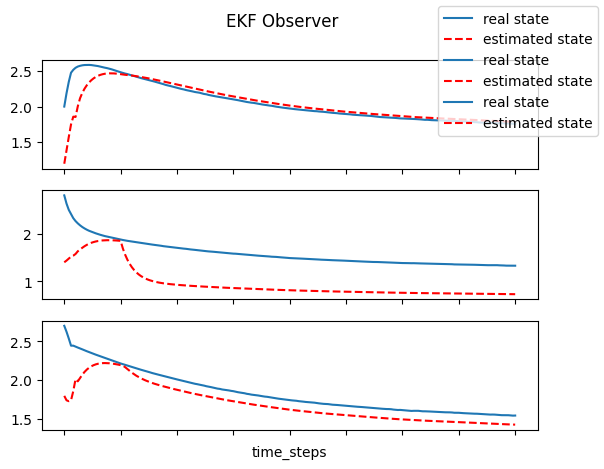

In [24]:
#x0 = np.array([2, 2.8, 2.7]).reshape([-1, 1])
#x_observer = np.array([1.2, 1.4, 1.8]).reshape([-1, 1])


# Define the measurement covariance matrix
#R = np.array([0.01])

# Covariance matrix of the state noise
#q1 = 1e-3;
#q2 = 1e-3;
#q3 = 1e-3;

#Q = np.diag([q1, q2,q3]);

# Covariance Matrix of initial error
#P0 = Q ;
#N_sim = 200

#call EKF function
[plant_state1, obs_state_discrete1, plant_measurement1] = discrete_EKF_filter_do_mpc(x0, x_observer, P0, Q, R, N_sim, debug_flag=True, non_linear_simulation=True)
visualize(plant_state1, obs_state_discrete1)